# Projeto

In [1]:
import pandas as pd
import re
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

In [2]:
from pandas import DataFrame

file_tag = 'credit_score'
filename = 'class_credit_score.csv'
original_dataset: DataFrame = pd.read_csv(filename, index_col='ID', sep=',', decimal='.', na_values='')

original_dataset.dtypes

Customer_ID                object
Month                      object
Name                       object
Age                        object
SSN                        object
Occupation                 object
Annual_Income             float64
Monthly_Inhand_Salary     float64
Num_Bank_Accounts           int64
Num_Credit_Card             int64
Interest_Rate               int64
NumofLoan                   int64
Type_of_Loan               object
Delay_from_due_date         int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
CreditMix                  object
OutstandingDebt           float64
CreditUtilizationRatio    float64
Credit_History_Age         object
Payment_of_Min_Amount      object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
Payment_Behaviour          object
MonthlyBalance            float64
Credit_Score               object
dtype: object

*Tratar de valores de input errados*


In [3]:
import numpy as np

columns_to_treat = ["Age", "SSN", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]
relevant = ["Age", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]

df = pd.DataFrame(original_dataset)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].apply(lambda x: np.nan if x == -500 or x >= 150 else x)
df['Age'] = df['Age'].astype(str).str.replace('_', '', regex=False)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check and clean 'SSN' column
pattern = r'^\d{3}-\d{2}-\d{4}$'  # Replace this with your SSN regex pattern
df['SSN'] = df['SSN'].apply(lambda x: x if re.match(pattern, str(x)) else np.nan)

df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0 else np.nan)

#df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x >= 0 and x <= 100 else np.nan) TAXAS JURO ACIMA DE 30 E TAL IMPOSSIVEL

df['NumofLoan'] = df['NumofLoan'].apply(lambda x: x if x >= 0 else np.nan)

df['MonthlyBalance'] = df['MonthlyBalance'].apply(lambda x: x if x >= 0 else np.nan)

## Data Profiling

### Data Dimensionality

#### Figure 1 Nr Records x Nr variables

*vale a pena experimentar com outros tipos de gráficos???*
- nao ha curse of dimensionality

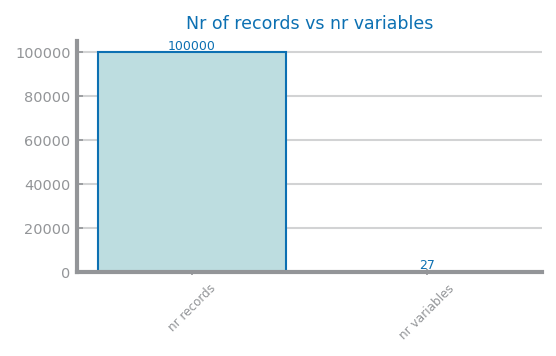

In [120]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
savefig(f"images/dim_dist/fig_1_records_variables.png")
show()

#### Figure 2 mr variables per type

*Rever tipos de daods da função get_variable_type*
- Trocar "Age" de simbólico para numérico

In [121]:
df.dtypes

Customer_ID                object
Month                      object
Name                       object
Age                       float64
SSN                        object
Occupation                 object
Annual_Income             float64
Monthly_Inhand_Salary     float64
Num_Bank_Accounts         float64
Num_Credit_Card             int64
Interest_Rate               int64
NumofLoan                 float64
Type_of_Loan               object
Delay_from_due_date         int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
CreditMix                  object
OutstandingDebt           float64
CreditUtilizationRatio    float64
Credit_History_Age         object
Payment_of_Min_Amount      object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
Payment_Behaviour          object
MonthlyBalance            float64
Credit_Score               object
dtype: object

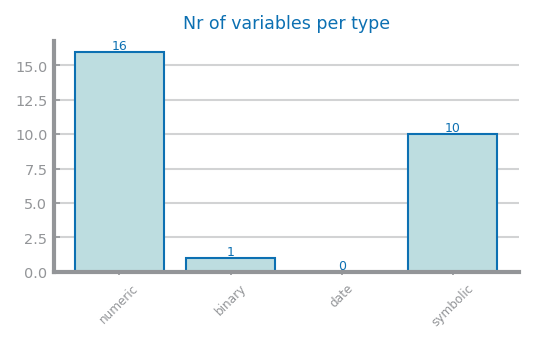

In [122]:
from dslabs_functions import get_variable_types

variable_types: dict[str, list] = get_variable_types(df)

counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"images/dim_dist/fig_2_variable_types.png")
show()

*Passar de object para category (simbolicas no panda)*

In [123]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

Customer_ID               category
Month                     category
Name                      category
Age                        float64
SSN                       category
Occupation                category
Annual_Income              float64
Monthly_Inhand_Salary      float64
Num_Bank_Accounts          float64
Num_Credit_Card              int64
Interest_Rate                int64
NumofLoan                  float64
Type_of_Loan              category
Delay_from_due_date          int64
NumofDelayedPayment        float64
ChangedCreditLimit         float64
NumCreditInquiries         float64
CreditMix                 category
OutstandingDebt            float64
CreditUtilizationRatio     float64
Credit_History_Age        category
Payment_of_Min_Amount     category
TotalEMIpermonth           float64
Amountinvestedmonthly      float64
Payment_Behaviour         category
MonthlyBalance             float64
Credit_Score                object
dtype: object

#### Figure 3 Nr missing values for dataset

In [124]:
mv = {}

for var in df.columns:
    nr = df[var].isna().sum()
    print(var + " - " + str(nr))
    if nr > 0:
        mv[var] = nr

Customer_ID - 0
Month - 0
Name - 9985
Age - 7617
SSN - 5572
Occupation - 7062
Annual_Income - 0
Monthly_Inhand_Salary - 15002
Num_Bank_Accounts - 21
Num_Credit_Card - 0
Interest_Rate - 0
NumofLoan - 3876
Type_of_Loan - 11408
Delay_from_due_date - 0
NumofDelayedPayment - 7002
ChangedCreditLimit - 2091
NumCreditInquiries - 1965
CreditMix - 20195
OutstandingDebt - 0
CreditUtilizationRatio - 0
Credit_History_Age - 9030
Payment_of_Min_Amount - 0
TotalEMIpermonth - 0
Amountinvestedmonthly - 4479
Payment_Behaviour - 7600
MonthlyBalance - 1209
Credit_Score - 0


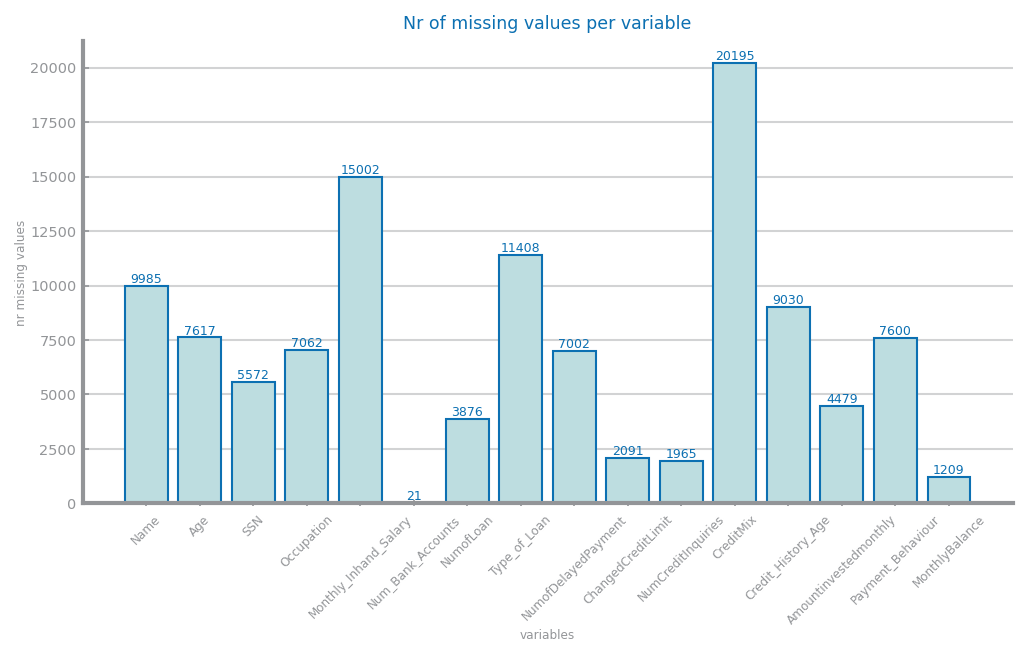

In [125]:
mv: dict[str, int] = {}

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure(figsize=(8, 4))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/dim_dist/figure_3_mv.png")
show()

*Valores nulos em percentagem(%)*

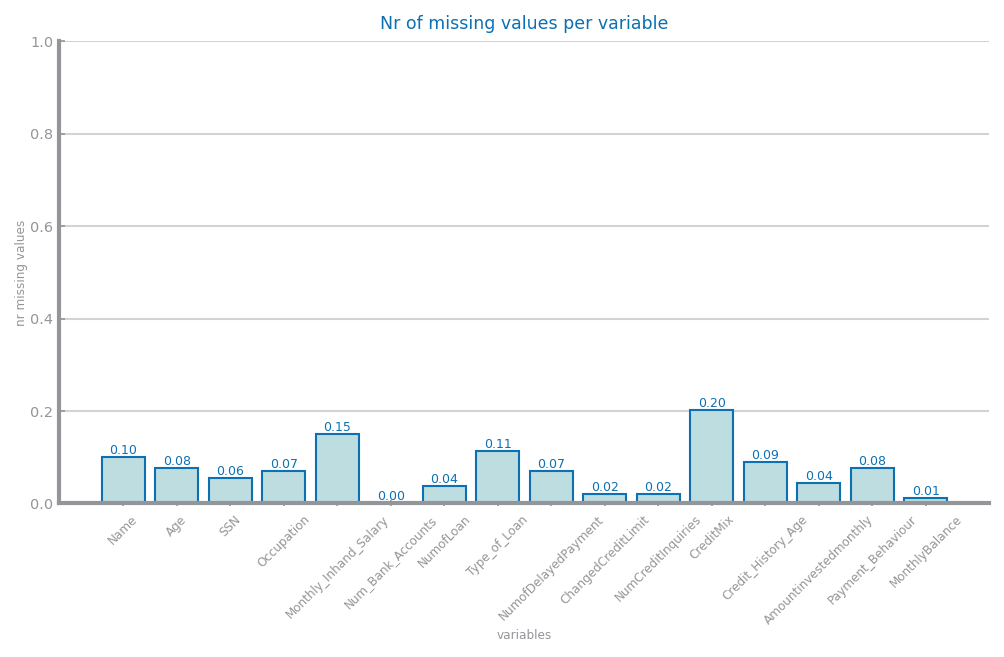

In [126]:
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    percentage = (nr / len(df[var]))
    if nr > 0:
        mv[var] = percentage

figure(figsize=(8, 4))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
    percentage=True
)
savefig(f"images/dim_dist/figure_3_mv_percentages.png")
show()

### Data Distribution

In [127]:
summary5: DataFrame = df.describe(include='all')
summary5

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,Credit_History_Age,Payment_of_Min_Amount,TotalEMIpermonth,Amountinvestedmonthly,Payment_Behaviour,MonthlyBalance,Credit_Score
count,100000,100000,90015,92383.000000,94428,92938,1.000000e+05,84998.000000,99979.000000,100000.00000,...,79805,100000.000000,100000.000000,90970,100000,100000.000000,95521.000000,92400,98791.000000,100000
unique,12500,8,10139,NaN,12500,15,NaN,NaN,NaN,NaN,...,3,NaN,NaN,404,3,NaN,NaN,6,NaN,2
top,CUS_0x1000,April,Langep,NaN,000-08-1349,Lawyer,NaN,NaN,NaN,NaN,...,Standard,NaN,NaN,15 Years and 11 Months,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Good
freq,8,12500,44,NaN,8,6575,NaN,NaN,NaN,NaN,...,36479,NaN,NaN,446,52326,NaN,NaN,25513,NaN,71002
mean,NaN,NaN,NaN,33.329022,NaN,NaN,1.764157e+05,4194.170850,17.095080,22.47443,...,NaN,1426.220376,32.285173,NaN,NaN,1403.118217,637.412998,NaN,402.551258,NaN
std,NaN,NaN,NaN,10.827340,NaN,NaN,1.429618e+06,3183.686167,117.416871,129.05741,...,NaN,1155.129026,5.116875,NaN,NaN,8306.041270,2043.319327,NaN,213.925499,NaN
min,NaN,NaN,NaN,14.000000,NaN,NaN,7.005930e+03,303.645417,0.000000,0.00000,...,NaN,0.230000,20.000000,NaN,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,24.000000,NaN,NaN,1.945750e+04,1625.568229,3.000000,4.00000,...,NaN,566.072500,28.052567,NaN,NaN,30.306660,74.534002,NaN,270.106630,NaN
50%,NaN,NaN,NaN,33.000000,NaN,NaN,3.757861e+04,3093.745000,6.000000,5.00000,...,NaN,1166.155000,32.305784,NaN,NaN,69.249473,135.925681,NaN,336.731225,NaN
75%,NaN,NaN,NaN,42.000000,NaN,NaN,7.279092e+04,5957.448333,7.000000,7.00000,...,NaN,1945.962500,36.496663,NaN,NaN,161.224249,265.731733,NaN,470.262938,NaN


#### Figure 4 Global Boxplots

*Não nos dá informação quase nenhuma*
- Boxplots are not applicable to non-numeric variables.

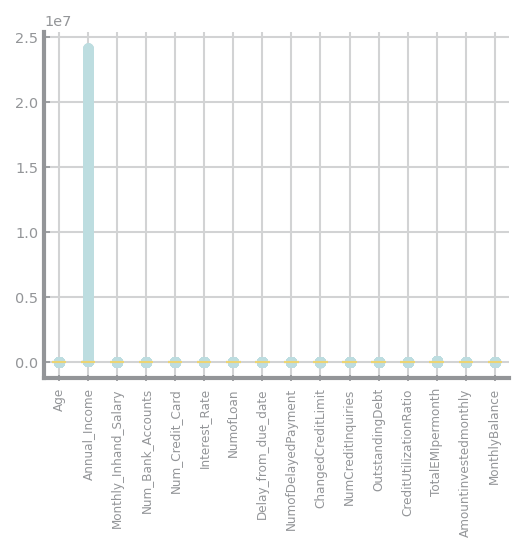

In [128]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    df[numeric].boxplot(rot=90)
    savefig(f"images/dim_dist/fig_4_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

*Tirar 'Annual_Income' && 'TotalEMIpermonth' para ver se temos outra perspetiva*

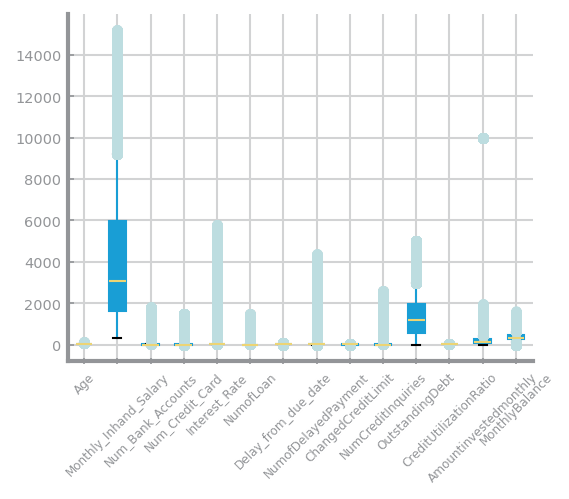

In [129]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    excluded_indices = {1, len(numeric) - 3}
    numeric_excluded = [var for idx, var in enumerate(numeric) if idx not in excluded_indices]
    df[numeric_excluded].boxplot(rot=45)
    savefig(f"images/dim_dist/fig_4_global_boxplot_without_vars.png")
    show()
else:
    print("There are no numeric variables.")

#### Figure 6 Singe Variable Boxplots

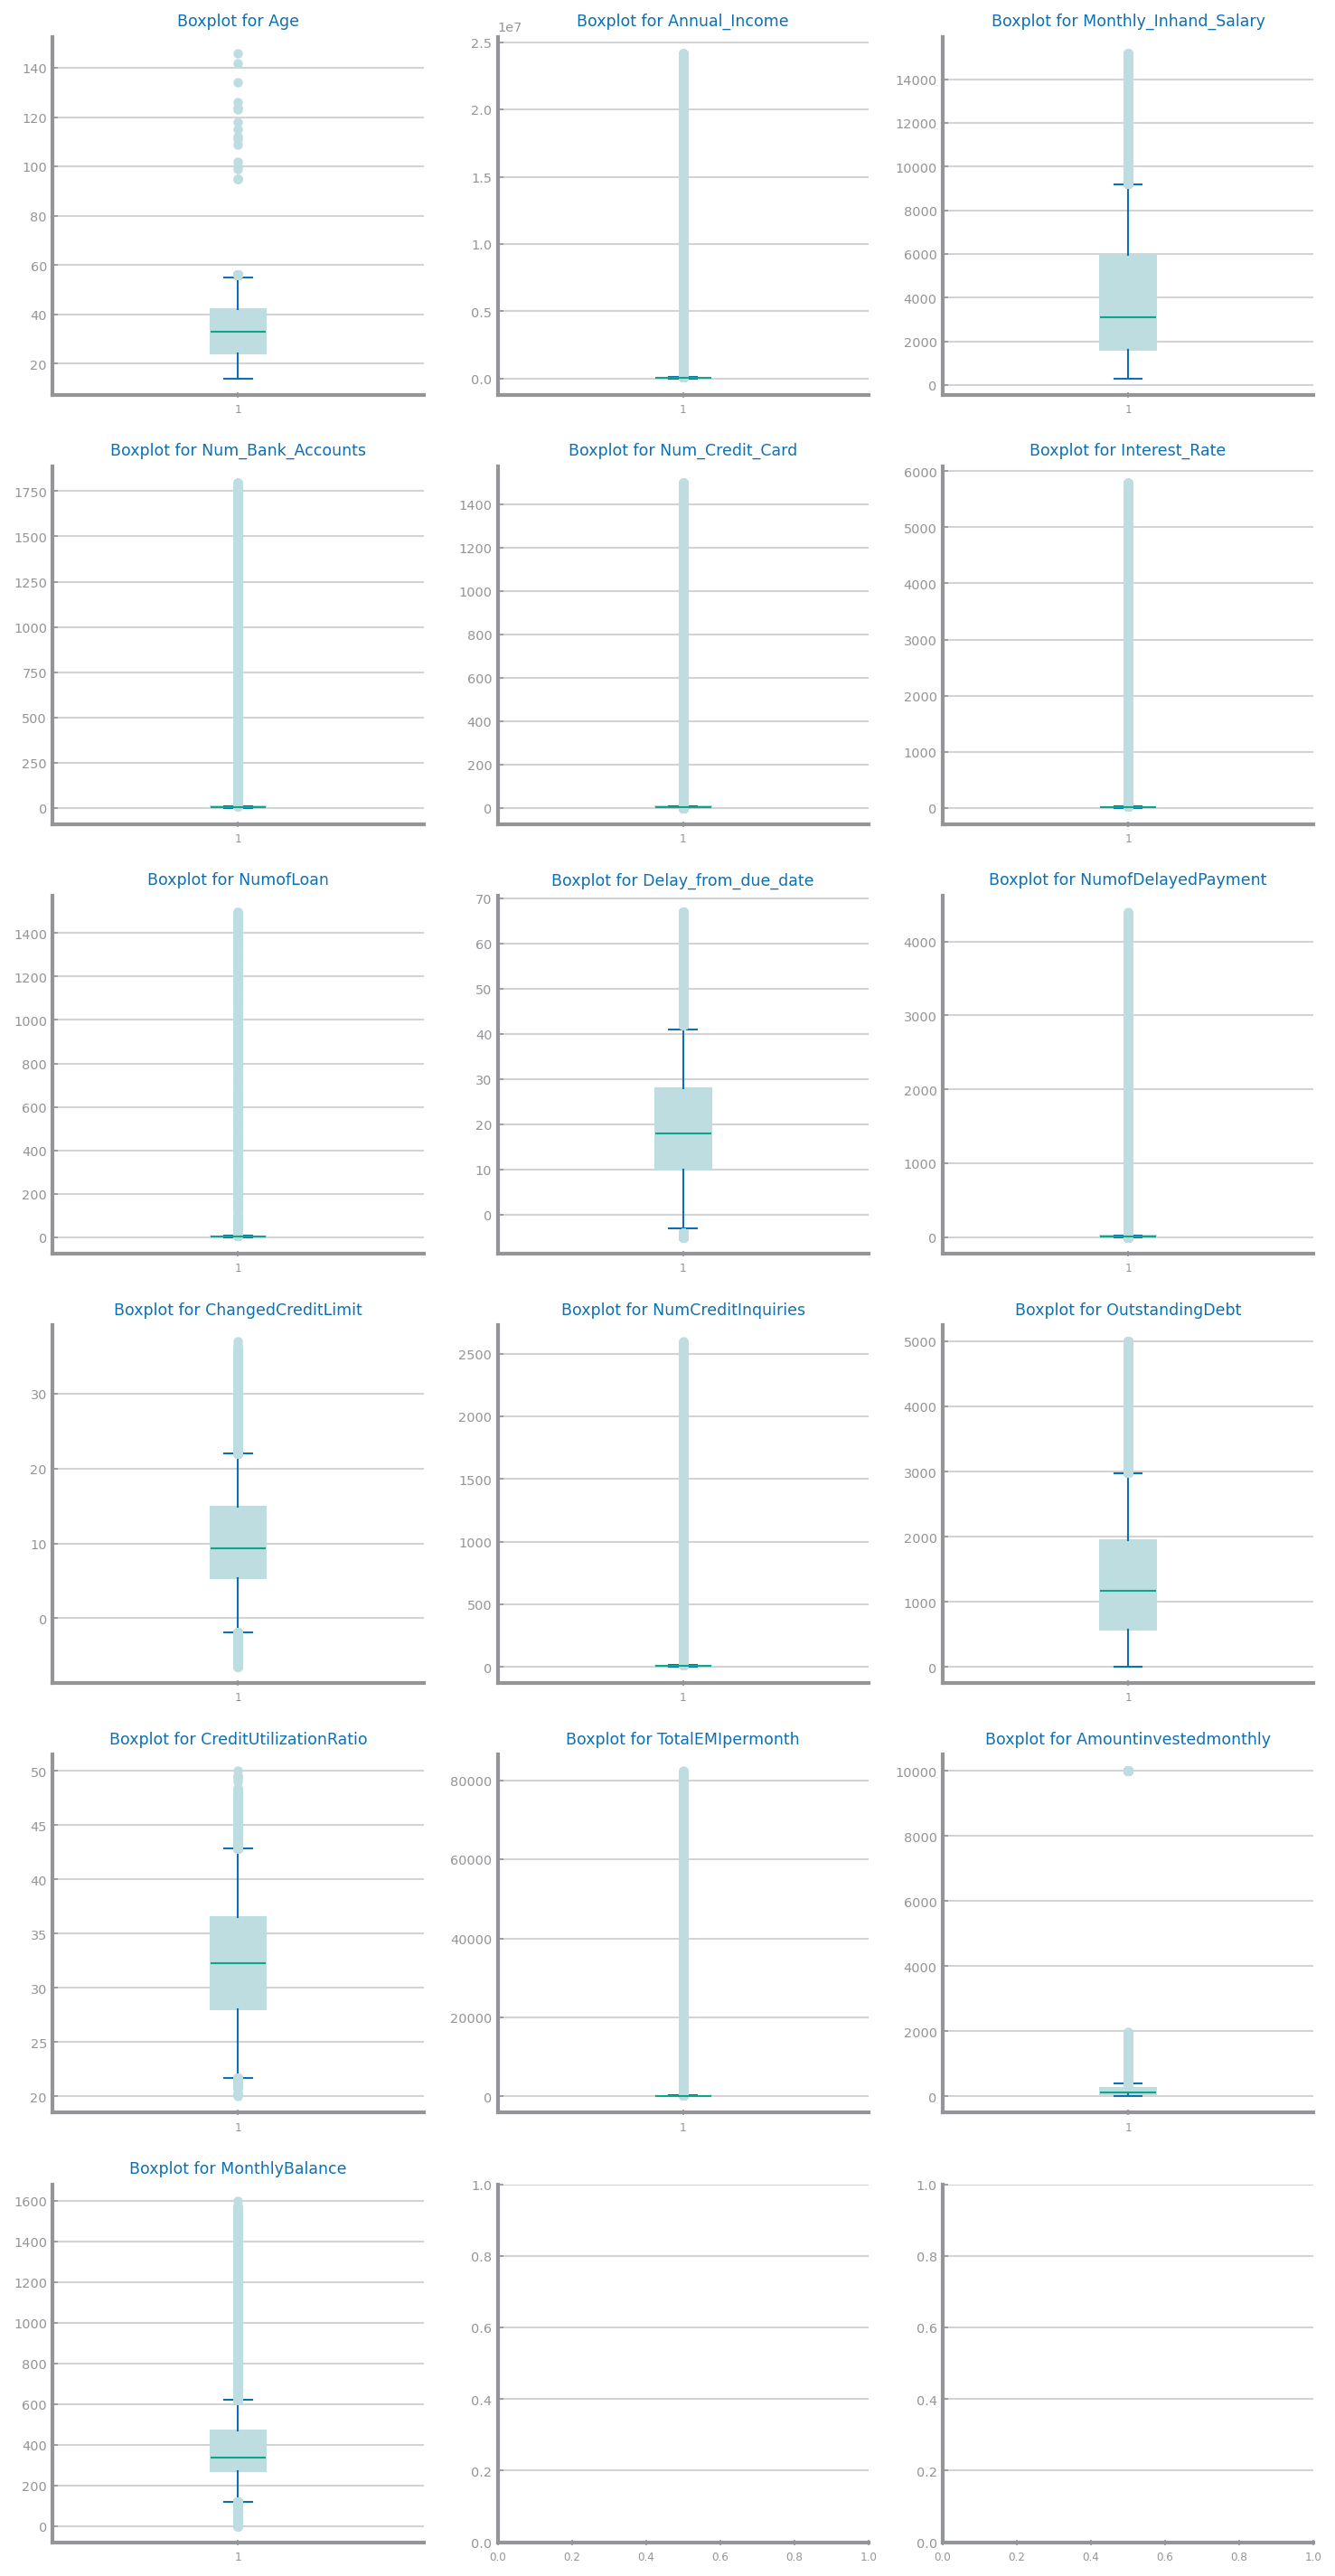

In [130]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/dim_dist/fig_6_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

*MonthlyBalance Missing Values removed to analyse the Boxplot better// Faz sentido? Fazer o mesmo para outras?*

#### Figure 8 Histograms

*Numericos*

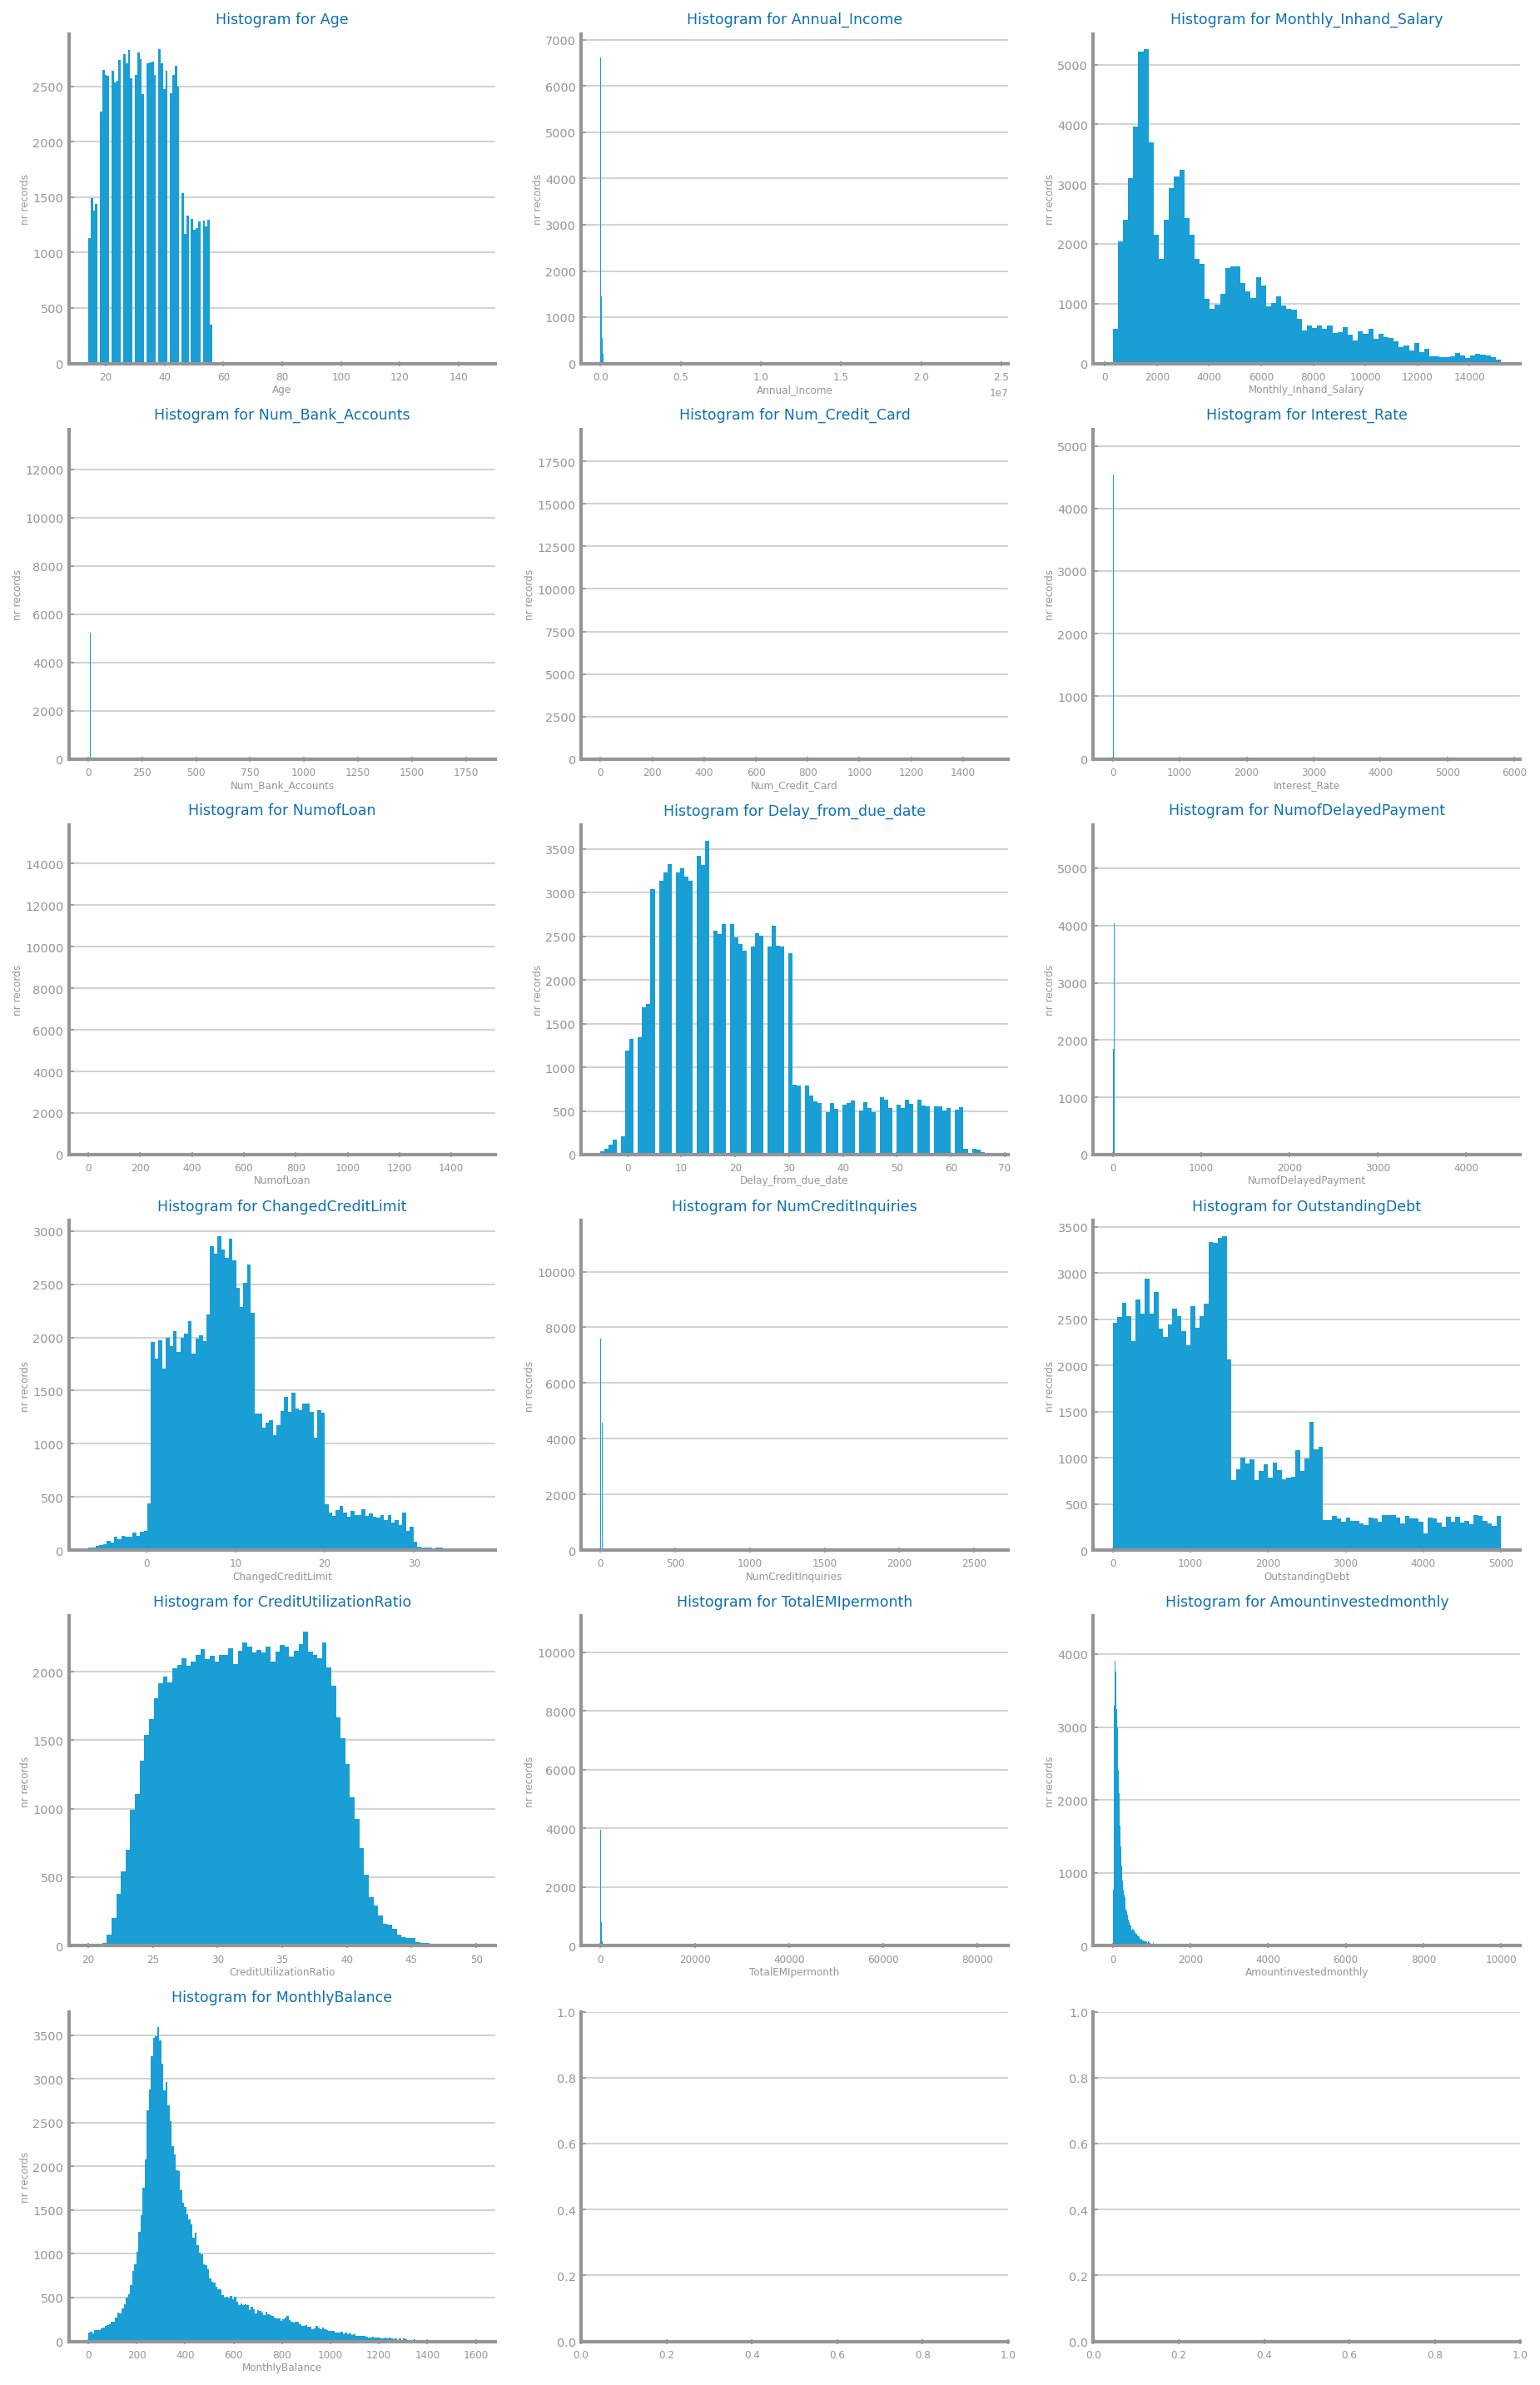

In [131]:
from dslabs_functions import set_chart_labels

if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT+3, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/dim_dist/fig_8_single_histograms_numeric.png")
    show()

*Simbólicos*

12 12


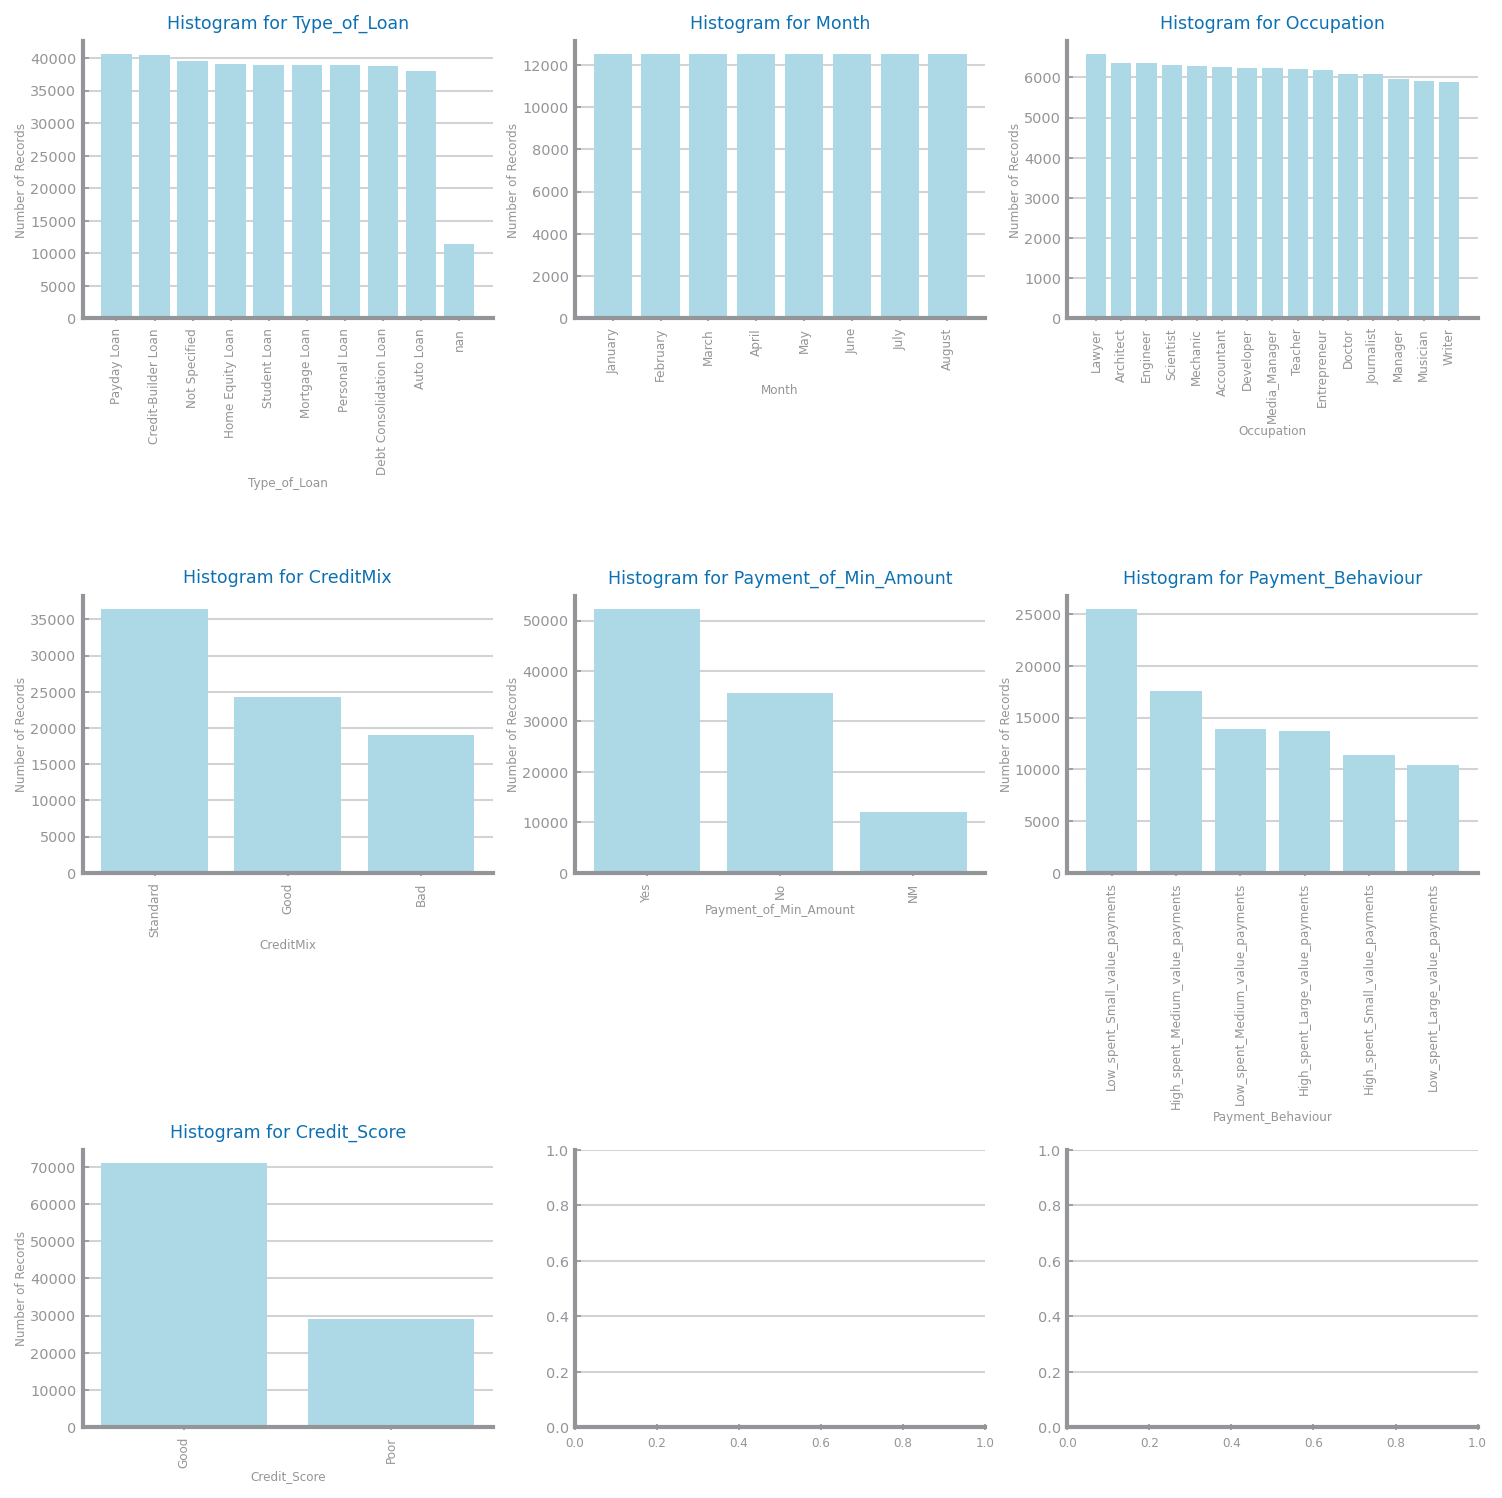

In [4]:
# Select columns with numerical and string data types
from matplotlib import pyplot as plt
import dslabs_functions as ds

string_cols = df.select_dtypes(include="object").columns
symbolic_cols = [col for col in string_cols if col not in ["ID", "Name", "Customer_ID", "SSN", "Age", "Credit_History_Age"]]

# Combine numerical and string columns
rows, cols = ds.define_grid(len(symbolic_cols))

print(cols * ds.HEIGHT, rows * ds.HEIGHT)
fig, axs = plt.subplots(rows, cols, figsize=(cols * ds.HEIGHT, rows * ds.HEIGHT))
i, j = 0, 0
plt.subplots_adjust(hspace=1)

            
types = df["Type_of_Loan"]

types_values = []
for text in types:
    matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
    m_filtered = [m if "and" not in m else m[4:] for m in matches]
    types_values += m_filtered

final = pd.Series(types_values).value_counts()

axs[i, j].set_title('Histogram for %s' % "Type_of_Loan")
axs[i, j].set_xlabel("Type_of_Loan")
axs[i, j].set_ylabel('Number of Records')
axs[i, j].bar(final.index, final.values, color = "lightblue")
axs[i, j].set_xticklabels(final.index, rotation=90)
i, j = i, j+1

for col in symbolic_cols:
    if col != "Type_of_Loan":
        axs[i, j].set_title('Histogram for %s' % col)
        axs[i, j].set_xlabel(col)
        axs[i, j].set_ylabel('Number of Records')
        value_counts = df[col].value_counts()
        axs[i, j].bar(value_counts.index, value_counts.values, color='lightblue')
        axs[i, j].set_xticklabels(value_counts.index, rotation=90)
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)

plt.savefig(f"images/ddd.png")  # Save the figure
plt.show()

Credit_Score
Good    71002
Poor    28998
Name: count, dtype: int64


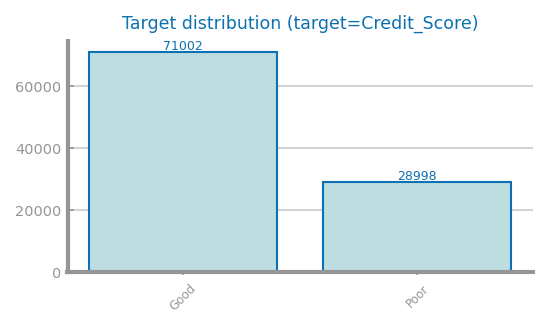

In [6]:
from pandas import Series


target = "Credit_Score"

values: Series = df[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"images/target.png")
show()

*Try to fit different known distributions*

#### Figure 10 Outlier Study

#### Figure 12 Class Distribution